In [ ]:
#Python-ի գրադարաններից կանչում ենք,այն կոդերը որոնք անհրաժեշտ են մեր վերլուծության համար։

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



In [ ]:
Data=pd.read_csv('insurance.csv')


In [ ]:
Data #Կանչում ենք մոր դատան


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
Data.info() #ստանում ենք ընդհանուր տեղեկատվություն


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


In [ ]:
Data.corr() #հաշվում ենք փոփոկականներ միջև կախվածությունը


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


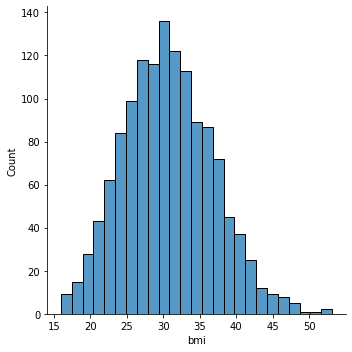

In [ ]:
sns.displot(Data.bmi)


<AxesSubplot:>

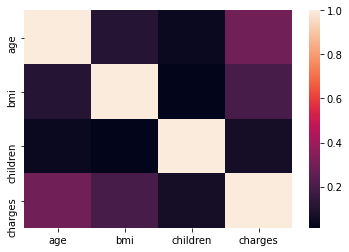

In [ ]:
sns.heatmap(Data.corr())


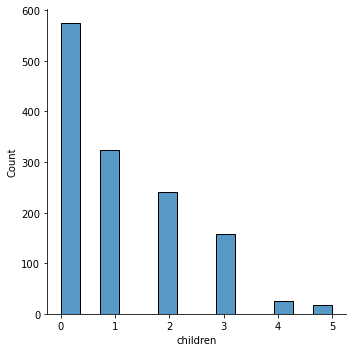

In [ ]:
sns.displot(Data.children)


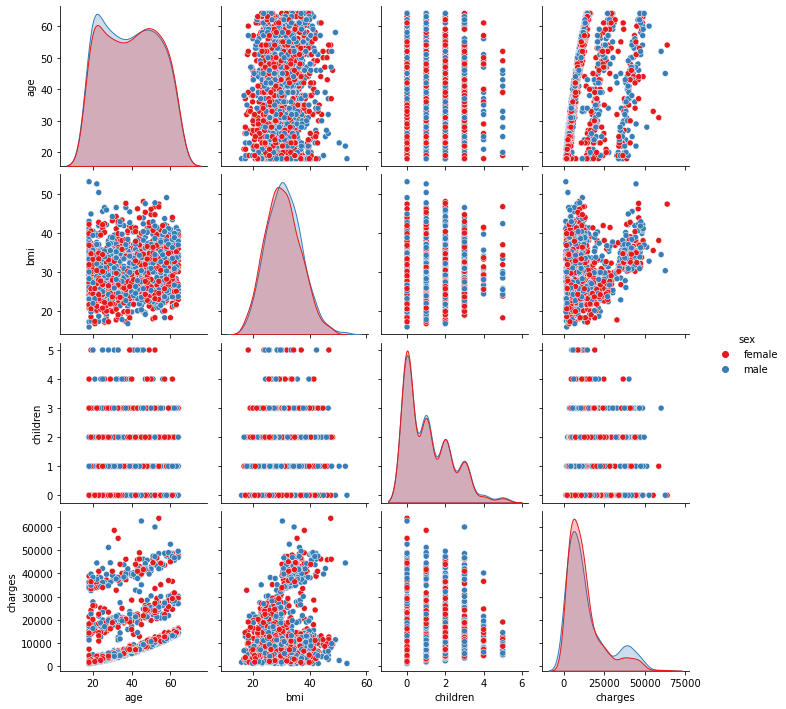

In [ ]:
sns.pairplot(Data, hue='sex', palette='Set1')


In [ ]:
Data['charges'].max()


63770.42801

In [ ]:
Data['charges'].min()


1121.8739

In [ ]:
Data.isnull().count()  #գտնում ենք չլրացված տողերի քանակը


age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [ ]:
#Կատեգորյալ փոփոխականների ձևափոխում

Data['sex_female']=pd.get_dummies(Data.sex).female
Data['sex_male']=pd.get_dummies(Data.sex).male
Data['smoker_yes']=pd.get_dummies(Data.smoker).yes
Data['smoker_no']=pd.get_dummies(Data.smoker).no
Data['region_southwest']=pd.get_dummies(Data.region).southwest
Data['region_southeast']=pd.get_dummies(Data.region).southeast
Data['region_northwest']=pd.get_dummies(Data.region).northwest
Data['region_northeast']=pd.get_dummies(Data.region).northeast
Data=Data.drop(['sex','smoker','region'],axis=1) #ջնջում ենք սյուները
Data


,age,bmi,children,charges,sex_female,sex_male,smoker_yes,smoker_no,region_southwest,region_southeast,region_northwest,region_northeast
0,19,27.900,0,16884.92400,1,0,1,0,1,0,0,0
1,18,33.770,1,1725.55230,0,1,0,1,0,1,0,0
2,28,33.000,3,4449.46200,0,1,0,1,0,1,0,0
3,33,22.705,0,21984.47061,0,1,0,1,0,0,1,0
4,32,28.880,0,3866.85520,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,0,1,0,0,1,0
1334,18,31.920,0,2205.98080,1,0,0,1,0,0,0,1
1335,18,36.850,0,1629.83350,1,0,0,1,0,1,0,0
1336,21,25.800,0,2007.94500,1,0,0,1,1,0,0,0


In [ ]:
#Մինիմաքսի նորմալացում
a=Data.age.min()
b=Data.age.max()
Data['age_new']=(Data.age-a)/(b-a)

d=Data.bmi.min()
e=Data.bmi.max()
Data['bmi_new']=(Data.bmi-d)/(e-d)

f=Data.children.min()
g=Data.children.max()
Data['children_new']=(Data.children-f)/(g-f)

In [ ]:
Data=Data.drop(['age','bmi','children'],axis=1) #ջնջում ենք սյուները

In [ ]:
Data


,charges,sex_female,sex_male,smoker_yes,smoker_no,region_southwest,region_southeast,region_northwest,region_northeast,age_new,bmi_new,children_new
0,16884.92400,1,0,1,0,1,0,0,0,0.021739,0.321227,0.0
1,1725.55230,0,1,0,1,0,1,0,0,0.000000,0.479150,0.2
2,4449.46200,0,1,0,1,0,1,0,0,0.217391,0.458434,0.6
3,21984.47061,0,1,0,1,0,0,1,0,0.326087,0.181464,0.0
4,3866.85520,0,1,0,1,0,0,1,0,0.304348,0.347592,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,10600.54830,0,1,0,1,0,0,1,0,0.695652,0.403820,0.6
1334,2205.98080,1,0,0,1,0,0,0,1,0.000000,0.429379,0.0
1335,1629.83350,1,0,0,1,0,1,0,0,0.000000,0.562012,0.0
1336,2007.94500,1,0,0,1,1,0,0,0,0.065217,0.264730,0.0


In [ ]:
Data.corr()

,charges,sex_female,sex_male,smoker_yes,smoker_no,region_southwest,region_southeast,region_northwest,region_northeast,age_new,bmi_new,children_new
charges,1.000000,-0.057292,0.057292,0.787251,-0.787251,-0.043210,0.073982,-0.039905,0.006349,0.299008,0.198341,0.067998
sex_female,-0.057292,1.000000,-1.000000,-0.076185,0.076185,0.004184,-0.017117,0.011156,0.002425,0.020856,-0.046371,-0.017163
sex_male,0.057292,-1.000000,1.000000,0.076185,-0.076185,-0.004184,0.017117,-0.011156,-0.002425,-0.020856,0.046371,0.017163
smoker_yes,0.787251,-0.076185,0.076185,1.000000,-1.000000,-0.036945,0.068498,-0.036945,0.002811,-0.025019,0.003750,0.007673
smoker_no,-0.787251,0.076185,-0.076185,-1.000000,1.000000,0.036945,-0.068498,0.036945,-0.002811,0.025019,-0.003750,-0.007673
region_southwest,-0.043210,0.004184,-0.004184,-0.036945,0.036945,1.000000,-0.346265,-0.320829,-0.320177,0.010016,-0.006205,0.021914
region_southeast,0.073982,-0.017117,0.017117,0.068498,-0.068498,-0.346265,1.000000,-0.346265,-0.345561,-0.011642,0.270025,-0.023066
region_northwest,-0.039905,0.011156,-0.011156,-0.036945,0.036945,-0.320829,-0.346265,1.000000,-0.320177,-0.000407,-0.135996,0.024806
region_northeast,0.006349,0.002425,-0.002425,0.002811,-0.002811,-0.320177,-0.345561,-0.320177,1.000000,0.002475,-0.138156,-0.022808
age_new,0.299008,0.020856,-0.020856,-0.025019,0.025019,0.010016,-0.011642,-0.000407,0.002475,1.000000,0.109272,0.042469


In [ ]:
Data.cov()

,charges,sex_female,sex_male,smoker_yes,smoker_no,region_southwest,region_southeast,region_northwest,region_northeast,age_new,bmi_new,children_new
charges,1.466524e+08,-347.014469,347.014469,3848.667032,-3848.667032,-224.482116,398.845220,-207.311324,32.948219,1105.973963,394.062535,198.534839
sex_female,-3.470145e+02,0.250160,-0.250160,-0.015383,0.015383,0.000898,-0.003811,0.002394,0.000520,0.003186,-0.003805,-0.002070
sex_male,3.470145e+02,-0.250160,0.250160,0.015383,-0.015383,-0.000898,0.003811,-0.002394,-0.000520,-0.003186,0.003805,0.002070
smoker_yes,3.848667e+03,-0.015383,0.015383,0.162969,-0.162969,-0.006398,0.012310,-0.006398,0.000486,-0.003085,0.000248,0.000747
smoker_no,-3.848667e+03,0.015383,-0.015383,-0.162969,0.162969,0.006398,-0.012310,0.006398,-0.000486,0.003085,-0.000248,-0.000747
region_southwest,-2.244821e+02,0.000898,-0.000898,-0.006398,0.006398,0.184037,-0.066130,-0.059044,-0.058863,0.001312,-0.000437,0.002267
region_southeast,3.988452e+02,-0.003811,0.003811,0.012310,-0.012310,-0.066130,0.198186,-0.066130,-0.065926,-0.001583,0.019722,-0.002476
region_northwest,-2.073113e+02,0.002394,-0.002394,-0.006398,0.006398,-0.059044,-0.066130,0.184037,-0.058863,-0.000053,-0.009572,0.002566
region_northeast,3.294822e+01,0.000520,-0.000520,0.000486,-0.000486,-0.058863,-0.065926,-0.058863,0.183652,0.000324,-0.009714,-0.002357
age_new,1.105974e+03,0.003186,-0.003186,-0.003085,0.003085,0.001312,-0.001583,-0.000053,0.000324,0.093290,0.005476,0.003127


In [ ]:
# Մոդելի համար անկախ փոփոխականների ընտրում
X_data=Data[['age_new','bmi_new','smoker_yes','smoker_no','children_new','region_southeast','region_northwest','region_northeast','region_southwest','sex_female','sex_male']]

In [ ]:
# Մոդելի համար կախյալ փոփոխականների ընտրում
Y_data=Data.charges

In [ ]:
# Dataset-ի բաժանում ուսուցման (70%) և թեստավորման (30%) ընտրանքների
x_train, x_test, y_train, y_test=train_test_split(X_data,Y_data, test_size=0.3)

In [ ]:
# Գծային ռեգրեսիայի մոդլի ստեղծում
Lm=LinearRegression()

In [ ]:
y_pred_test=Lm.predict(x_test)

In [ ]:
y_pred

In [ ]:
# Ստեղծած մոդելի ուսուցում ուսուցման համար նախատեսված ընտրանքի հիման վրա
lm1.fit(x_train,y_train)

In [ ]:
y_pred

In [ ]:
# Ռեգրեսիոն մոդելի b0 գործակցի արժեքի ստացում
Lm.intercept_

In [ ]:
# Մոդելում ներառված b1, b2, b3 և b4 գործակիցների արժեքների ստացում
Lm.coef_

In [ ]:
#ցույց է տալիս առավելագույն մնացորդային սխալը
max_error(y_train, y_pred)

In [ ]:
max_error(y_test, y_pred_test)

In [ ]:
#score-ը հանդիսանում է դետերմինացիայի գործակից
Lm.score(x_train, y_train)

In [ ]:
Lm.score(x_test, y_test)

<AxesSubplot:xlabel='bmi_new', ylabel='charges'>

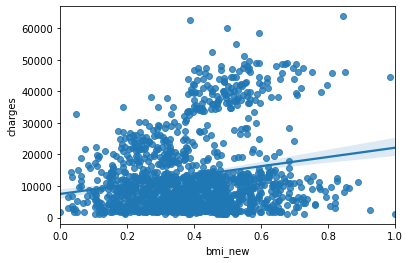

In [ ]:
sns.regplot(x='bmi_new',y='charges', data=Data)